EDA

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("combined_data_with_toxicity.csv")

# Shape
print("📏 Dataset Shape:", df.shape)


# Data types
print("\n Column Data Types:")
print(df.dtypes)



📏 Dataset Shape: (5482, 15)

 Column Data Types:
video_id             object
title                object
description          object
category             object
view_count          float64
like_count          float64
comment_count         int64
duration             object
comments             object
toxicity_mean       float64
toxicity_max        float64
toxic_label_sum       int64
toxic_label_max       int64
toxic_label_mean    float64
total_comments        int64
dtype: object


In [ ]:
# First few rows
print("\n Preview:")
print(df.head(10))


 Preview:
      video_id                                              title  \
0  r16Rz2J5IZo              If Water Fights Were Like Video Games   
1  sPFII3ozSHI  EVE Online - Official Gameplay Trailer - Play ...   
2  BO8lX3hDU30         Cyberpunk 2077 — Official Gameplay Trailer   
3  TjP0UgI8CTg                                BROKE vs PRO Gaming   
4  vjF9GgrY9c0  Cyberpunk 2077 Gameplay Reveal — 48-minute wal...   
5  K-5EdHZ0hBs   Need for Speed Payback Official Gameplay Trailer   
6  FrLgREKD4kk  Let's Play Minecraft with Geoff, Jack, Michael...   
7  8o-VGnFaStg  I Made $246,397,197,269 by Deleting the Intern...   
8  Dw_oH5oiUSE     Red Dead Redemption 2: Official Gameplay Video   
9  LzYSH2TADh8  Fortnite Chapter 2 - Season 2 | Battle Pass Ga...   

                                         description category  view_count  \
0  A summer 2021 day with super soakers, water bl...   gaming  99031761.0   
1  http://bit.ly/2Y5TkTB 👈🚀 Start Playing EVE for...   gaming  81115979.0  

In [ ]:
# Null values per column
print("\n Missing Values per Column:")
print(df.isnull().sum())


 Missing Values per Column:
video_id              0
title                 0
description         122
category              0
view_count           14
like_count            6
comment_count         0
duration              0
comments              8
toxicity_mean         0
toxicity_max          0
toxic_label_sum       0
toxic_label_max       0
toxic_label_mean      0
total_comments        0
dtype: int64


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5482 entries, 0 to 5481
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          5482 non-null   object 
 1   title             5482 non-null   object 
 2   description       5360 non-null   object 
 3   category          5482 non-null   object 
 4   view_count        5468 non-null   float64
 5   like_count        5476 non-null   float64
 6   comment_count     5482 non-null   int64  
 7   duration          5482 non-null   object 
 8   comments          5474 non-null   object 
 9   toxicity_mean     5482 non-null   float64
 10  toxicity_max      5482 non-null   float64
 11  toxic_label_sum   5482 non-null   int64  
 12  toxic_label_max   5482 non-null   int64  
 13  toxic_label_mean  5482 non-null   float64
 14  total_comments    5482 non-null   int64  
dtypes: float64(5), int64(4), object(6)
memory usage: 642.6+ KB


In [ ]:
import pandas as pd

# Set pandas to show numbers without scientific notation, with 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

# Now when you run describe(), you'll see nice rounded numbers
print(df.describe())


         view_count  like_count  comment_count  toxicity_mean  toxicity_max  \
count       5468.00     5476.00        5482.00        5482.00       5482.00   
mean    16154451.06   106855.34        4691.73           0.11          0.95   
std    172541773.10   994691.10       49971.51           0.07          0.13   
min            0.00        0.00         100.00           0.00          0.00   
25%       470212.00     1346.75         189.00           0.06          0.98   
50%      1064567.00     4078.50         420.00           0.09          0.99   
75%      3124338.75    19792.00        1328.75           0.14          1.00   
max   6531963681.00 34654303.00     2401917.00           0.54          1.00   

       toxic_label_sum  toxic_label_max  toxic_label_mean  total_comments  
count          5482.00          5482.00           5482.00         5482.00  
mean             10.41             0.98              0.09          122.78  
std               7.70             0.16              0.07   

In [ ]:
# Unique values per column
print("\n Unique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")



 Unique Values per Column:
video_id: 5429
title: 5431
description: 5206
category: 4
view_count: 5406
like_count: 4447
comment_count: 2184
duration: 1415
comments: 5425
toxicity_mean: 5426
toxicity_max: 5229
toxic_label_sum: 50
toxic_label_max: 2
toxic_label_mean: 562
total_comments: 141


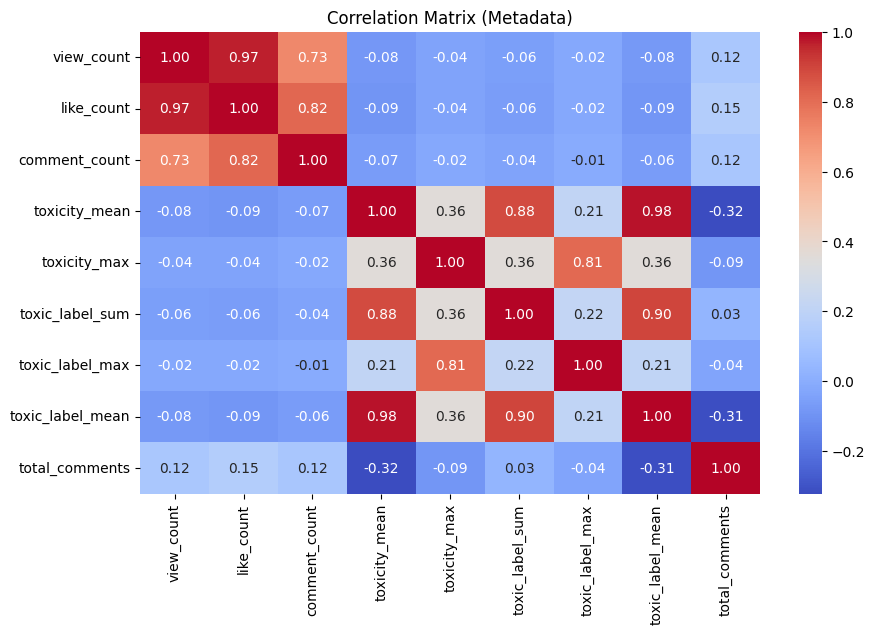

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Descriptive statistics for numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns


# Correlation heatmap
if len(numeric_cols) > 1:
    plt.figure(figsize=(10,6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix (Metadata)")
    plt.show()



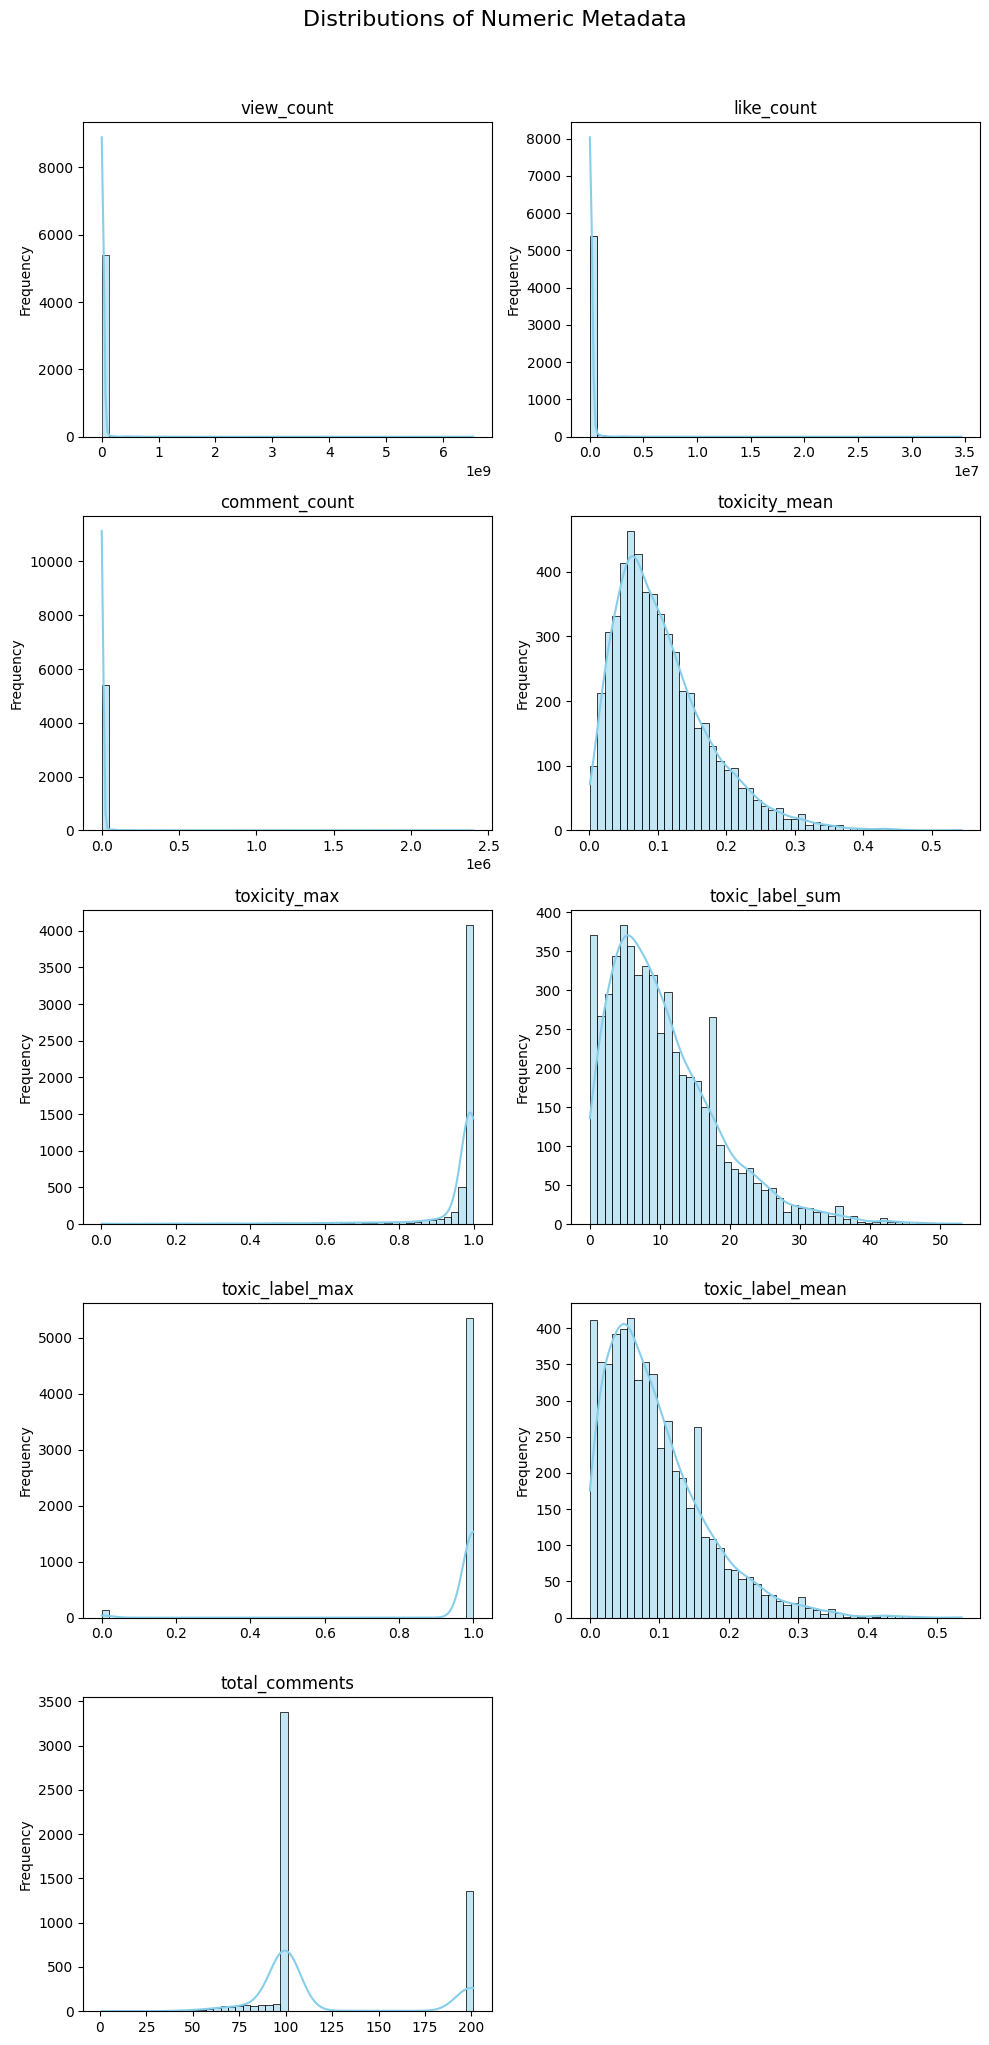

In [ ]:
# 📊 Combined histograms for numeric metadata in one figure

# Ensure we have numeric metadata columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

n_cols = 2  # number of plots per row
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # scale figure size
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(df[col], bins=50, kde=True, color='skyblue')
    plt.title(f"{col}", fontsize=12)
    plt.xlabel("")
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.suptitle("Distributions of Numeric Metadata", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


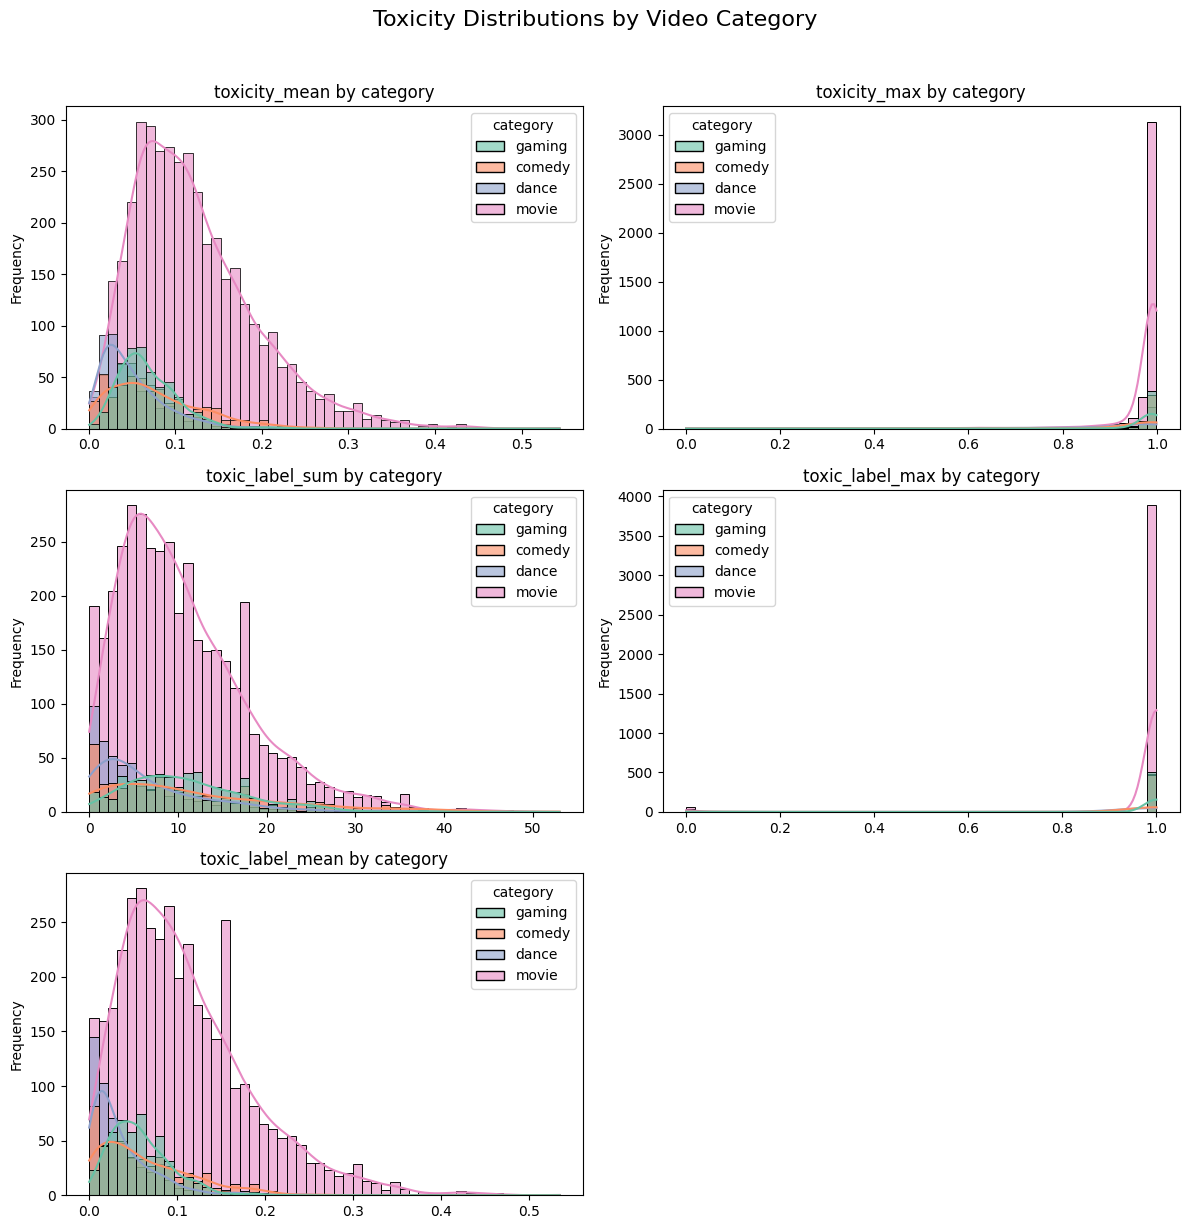

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Toxicity-related columns
toxicity_cols = [
    'toxicity_mean',
    'toxicity_max',
    'toxic_label_sum',
    'toxic_label_max',
    'toxic_label_mean'
]
toxicity_cols = [col for col in toxicity_cols if col in df.columns]

category_col = "category"
category_order = df[category_col].unique()  # keep dataset's order

# Plot grid
n_cols = 2
n_rows = int(np.ceil(len(toxicity_cols) / n_cols))

plt.figure(figsize=(n_cols * 6, n_rows * 4))
for idx, col in enumerate(toxicity_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(
        data=df,
        x=col,
        hue=category_col,
        hue_order=category_order,
        bins=50,
        kde=True,
        palette='Set2',
        alpha=0.6,
        legend=True
    )
    plt.title(f"{col} by {category_col}", fontsize=12)
    plt.xlabel("")
    plt.ylabel("Frequency")
    plt.tight_layout()

# Main title
plt.suptitle("Toxicity Distributions by Video Category", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# --- Paths ---
in_path  = "combined_data_with_toxicity.csv"
out_path = "Labeled_toxicity.csv"

df = pd.read_csv(in_path)

# --- Ensure required columns exist (fill missing with 0) ---
needed_numeric = ["toxicity_mean", "toxicity_max", "toxic_label_mean", "toxic_label_sum"]
for c in needed_numeric:
    if c not in df.columns:
        df[c] = 0
df[needed_numeric] = df[needed_numeric].fillna(0)

# (Optional) ensure text exists for downstream modeling
if "comments" not in df.columns:
    print("⚠️  'comments' column not found. Labels will be created, but text-based models need it.")

# --- Thresholds (tweak if needed) ---
MIN_TOXIC_RATIO = 0.30                  # >= 30% of comments toxic
MIN_TOXICITY_SCORE = 0.50               # mean Detoxify score
MIN_TOXIC_COUNT = 2                     # at least 2 toxic comments
HIGH_CONF_TOXIC_THRESHOLD = 0.90        # any highly toxic comment

# --- Vectorized refined logic ---
is_mean_toxic = df["toxicity_mean"] >= MIN_TOXICITY_SCORE
is_high_ratio = df["toxic_label_mean"] >= MIN_TOXIC_RATIO
is_many_toxic = df["toxic_label_sum"] >= MIN_TOXIC_COUNT
is_high_conf  = df["toxicity_max"] >= HIGH_CONF_TOXIC_THRESHOLD

toxic_mask = is_mean_toxic | (is_high_ratio & is_many_toxic) | is_high_conf

# Save both numeric and string labels
df["label"] = toxic_mask.astype(int)
df["Toxicity"] = np.where(toxic_mask, "Toxic", "Not Toxic")

# --- Write output ---
df.to_csv(out_path, index=False)
print(f"✅ Saved: {out_path}")
print("Class distribution (label):")
print(df["label"].value_counts().rename(index={0:"Not Toxic (0)", 1:"Toxic (1)"}))


✅ Saved: Labeled_toxicity.csv
Class distribution (label):
label
Toxic (1)        4923
Not Toxic (0)     559
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

category_col = "category"
toxicity_col = next((c for c in ["Toxicity","toxicity"] if c in df.columns), None)
if toxicity_col is None:
    raise ValueError("No toxicity label column found (looked for 'Toxicity' or 'toxicity').")

# Normalize toxicity to 0/1
if pd.api.types.is_numeric_dtype(df[toxicity_col]):
    df[toxicity_col] = df[toxicity_col].fillna(0).clip(0,1).astype(int)
else:
    df[toxicity_col] = (
        df[toxicity_col].astype(str).str.lower()
          .map({"1":1,"0":0,"true":1,"false":0,"yes":1,"no":0,"toxic":1,"non-toxic":0})
          .fillna(0).astype(int)
    )

# Counts by category x toxicity
summary = (
    df.groupby([category_col, toxicity_col], dropna=False)
      .size().reset_index(name="count")
)

# Clean legend labels
summary["tox_label"] = summary[toxicity_col].map({0:"non-toxic", 1:"toxic"})

# Percent within each category (use transform to keep index aligned)
summary["percent"] = (
    summary.groupby(category_col)["count"]
           .transform(lambda s: 100 * s / s.sum())
)

# --- Stacked percent bar ---
fig_pct = px.bar(
    summary, x=category_col, y="percent", color="tox_label",
    category_orders={"tox_label":["non-toxic","toxic"]},
    text=summary["percent"].round(1).astype(str) + "%",
    barmode="stack", title="Toxic vs Non-toxic by Category (Percent)",
    hover_data={"count":True, "percent":":.1f", category_col:False, "tox_label":False}
)
fig_pct.update_traces(textposition="inside")
fig_pct.update_yaxes(title="Percent", range=[0,100])
fig_pct.update_layout(legend_title_text="label", height=450)
fig_pct.show()



In [ ]:
# ==== TEXT PREP OPTION 1: Keras Tokenizer ====
# Works well for LSTM/GRU/CNN/MLP models

import os, re, json, math
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# -------------------
# CONFIG
# -------------------
CSV_PATH = "Labeled_toxicity.csv"
TEXT_COL = "comments"
LABEL_COL = "Toxicity"

# If doing multi-label (Detoxify) set these:
MULTILABEL_COLS = ["toxicity","severe_toxicity","obscene","threat","insult","identity_attack"]

VOCAB_SIZE   = 20000
MAX_LEN      = None     # if None, we’ll pick by length percentile
LEN_PERCENTILE = 95     # set max_len to 95th percentile of sequence lengths
TEST_SIZE    = 0.15
VAL_SIZE     = 0.15
SEED         = 42
OUTPUT_DIR   = "prep_out_keras"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# -------------------
# LOAD
# -------------------
df = pd.read_csv(CSV_PATH)
print("Columns:", list(df.columns))

# -------------------
# AUTO-DETECT COLUMNS (override by setting TEXT_COL/LABEL_COL above)
# -------------------
if TEXT_COL is None:
    candidates = ["comments","comment_text","text","clean_text","content","message"]
    TEXT_COL = next((c for c in candidates if c in df.columns), None)
    if TEXT_COL is None:
        raise ValueError(f"Couldn't auto-detect text column. Found: {list(df.columns)}")

# Decide binary vs multi-label
has_multi = all(col in df.columns for col in MULTILABEL_COLS)

if not has_multi:
    if LABEL_COL is None:
        bin_candidates = ["toxic_label","Toxicity","label","target","is_toxic"]
        LABEL_COL = next((c for c in bin_candidates if c in df.columns), None)
        if LABEL_COL is None:
            raise ValueError(
                "Couldn't auto-detect label column for binary task. "
                "Either provide LABEL_COL or include MULTILABEL_COLS in CSV."
            )

print(f"Using TEXT_COL='{TEXT_COL}'")
print("Task:", "multi-label" if has_multi else f"binary (LABEL_COL='{LABEL_COL}')")

# -------------------
# CLEANING
# -------------------
URL_RE   = re.compile(r"http\S+|www\.\S+")
HTML_RE  = re.compile(r"<.*?>")
MENTION  = re.compile(r"@\w+")
NON_ASCII= re.compile(r"[^\x00-\x7F]+")
MULTI_WS = re.compile(r"\s+")

def clean_text(s: str) -> str:
    if not isinstance(s, str):
        s = "" if pd.isna(s) else str(s)
    s = s.lower()
    s = URL_RE.sub(" ", s)
    s = HTML_RE.sub(" ", s)
    s = MENTION.sub(" ", s)
    s = NON_ASCII.sub(" ", s)
    s = re.sub(r"[^a-z0-9' ]+", " ", s)  # keep alnum and apostrophes
    s = MULTI_WS.sub(" ", s).strip()
    return s

texts = df[TEXT_COL].astype(str).map(clean_text).tolist()

# -------------------
# LABELS
# -------------------
if has_multi:
    y = df[MULTILABEL_COLS].astype(float).values
else:
    # Make sure binary labels are 0/1
    y_raw = df[LABEL_COL]
    if y_raw.dtype == bool:
        y = y_raw.astype(int).values
    else:
        # normalize to 0/1 if values are strings like "Toxic"/"Not Toxic"
        mapping = { "toxic":1, "toxic ":1, "1":1, 1:1, True:1, "yes":1,
                    "not toxic":0, "0":0, 0:0, False:0, "no":0 }
        y = y_raw.map(lambda v: mapping.get(str(v).strip().lower(), v)).astype(int).values

# -------------------
# TOKENIZE
# -------------------
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<unk>")
tokenizer.fit_on_texts(texts)
seqs = tokenizer.texts_to_sequences(texts)

lengths = np.array([len(s) for s in seqs])
if MAX_LEN is None:
    MAX_LEN = int(np.percentile(lengths, LEN_PERCENTILE))
    MAX_LEN = max(16, min(MAX_LEN, 512))  # keep a sane bound
print(f"MAX_LEN = {MAX_LEN} (from {LEN_PERCENTILE}th pct)")

X = pad_sequences(seqs, maxlen=MAX_LEN, padding="post", truncating="post")

# -------------------
# SPLIT train/val/test
# -------------------
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=SEED, stratify=y if not has_multi else None
)
val_ratio_adjusted = VAL_SIZE / (1.0 - TEST_SIZE)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_ratio_adjusted, random_state=SEED, stratify=y_temp if not has_multi else None
)

print("Shapes:",
      "\nX_train", X_train.shape, "y_train", y_train.shape,
      "\nX_val  ", X_val.shape,   "y_val  ", y_val.shape,
      "\nX_test ", X_test.shape,  "y_test ", y_test.shape)

# -------------------
# OPTIONAL: class weights for binary task
# -------------------
class_weights = None
if not has_multi:
    counts = Counter(y_train.tolist())
    neg, pos = counts.get(0, 1), counts.get(1, 1)
    # inverse frequency
    class_weights = {0: (1.0 / max(1, neg)), 1: (1.0 / max(1, pos))}
    # normalize to mean=1
    s = class_weights[0] + class_weights[1]
    class_weights = {k: v * 2.0 / s for k, v in class_weights.items()}
    print("class_weights:", class_weights)

# -------------------
# SAVE artifacts (useful for training scripts)
# -------------------
np.save(os.path.join(OUTPUT_DIR, "X_train.npy"), X_train)
np.save(os.path.join(OUTPUT_DIR, "X_val.npy"),   X_val)
np.save(os.path.join(OUTPUT_DIR, "X_test.npy"),  X_test)
np.save(os.path.join(OUTPUT_DIR, "y_train.npy"), y_train)
np.save(os.path.join(OUTPUT_DIR, "y_val.npy"),   y_val)
np.save(os.path.join(OUTPUT_DIR, "y_test.npy"),  y_test)

with open(os.path.join(OUTPUT_DIR, "tokenizer.json"), "w") as f:
    f.write(tokenizer.to_json())

with open(os.path.join(OUTPUT_DIR, "meta.json"), "w") as f:
    json.dump({
        "TEXT_COL": TEXT_COL,
        "LABEL_COL": LABEL_COL,
        "MULTILABEL_COLS": MULTILABEL_COLS if has_multi else None,
        "VOCAB_SIZE": VOCAB_SIZE,
        "MAX_LEN": MAX_LEN,
        "has_multi": has_multi
    }, f, indent=2)

print("✅ Keras text prep done. Files saved in", OUTPUT_DIR)


Columns: ['video_id', 'title', 'description', 'category', 'view_count', 'like_count', 'comment_count', 'duration', 'comments', 'toxicity_mean', 'toxicity_max', 'toxic_label_sum', 'toxic_label_max', 'toxic_label_mean', 'total_comments', 'label', 'Toxicity']
Using TEXT_COL='comments'
Task: binary (LABEL_COL='Toxicity')
MAX_LEN = 512 (from 95th pct)
Shapes: 
X_train (3836, 512) y_train (3836,) 
X_val   (823, 512) y_val   (823,) 
X_test  (823, 512) y_test  (823,)
class_weights: {0: 1.7961418143899897, 1: 0.2038581856100104}
✅ Keras text prep done. Files saved in prep_out_keras


In [ ]:
# === train_compare_keras.py ===
# Trains MLP, LSTM, GRU, BiLSTM on prep_out_keras data,
# tunes threshold on val (max F1), evaluates on test, and saves artifacts.

import os, json
from datetime import datetime
import numpy as np
import tensorflow as tf
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, precision_recall_curve, auc
)
import pandas as pd

# -------------------
# CONFIG
# -------------------
PREP_DIR    = "prep_out_keras"   # directory created by your prep step
RUNS_DIR    = "runs_keras"       # where to save all model outputs
os.makedirs(RUNS_DIR, exist_ok=True)

SEED        = 42
EPOCHS      = 200
BATCH_SIZE  = 64
PATIENCE    = 25
EMB_DIM     = 128
RNN_UNITS   = 64
LR          = 2e-3

tf.keras.utils.set_random_seed(SEED)

# -------------------
# LOAD PREPPED ARRAYS
# -------------------
X_train = np.load(os.path.join(PREP_DIR, "X_train.npy"))
X_val   = np.load(os.path.join(PREP_DIR, "X_val.npy"))
X_test  = np.load(os.path.join(PREP_DIR, "X_test.npy"))
y_train = np.load(os.path.join(PREP_DIR, "y_train.npy")).reshape(-1,).astype(int)
y_val   = np.load(os.path.join(PREP_DIR, "y_val.npy")).reshape(-1,).astype(int)
y_test  = np.load(os.path.join(PREP_DIR, "y_test.npy")).reshape(-1,).astype(int)

with open(os.path.join(PREP_DIR, "meta.json"), "r") as f:
    meta = json.load(f)

VOCAB_SIZE = int(meta["VOCAB_SIZE"])
MAX_LEN    = int(meta["MAX_LEN"])

print("Shapes:",
      "\nX_train", X_train.shape, " y_train", y_train.shape,
      "\nX_val  ", X_val.shape,   " y_val  ", y_val.shape,
      "\nX_test ", X_test.shape,  " y_test ", y_test.shape)
print("VOCAB_SIZE:", VOCAB_SIZE, " MAX_LEN:", MAX_LEN)

# -------------------
# CLASS WEIGHTS (binary)
# -------------------
neg = int((y_train == 0).sum())
pos = int((y_train == 1).sum())
cw0 = 1.0 / max(1, neg)
cw1 = 1.0 / max(1, pos)
s   = cw0 + cw1
CLASS_WEIGHTS = {0: 2*cw0/s, 1: 2*cw1/s}
print("class_weights:", CLASS_WEIGHTS)

# -------------------
# MODEL BUILDERS
# -------------------
def build_mlp(vocab_size, max_len, emb_dim=EMB_DIM):
    inp = tf.keras.Input(shape=(max_len,), dtype="int32")
    x = tf.keras.layers.Embedding(vocab_size, emb_dim, mask_zero=True)(inp)
    x = tf.keras.layers.GlobalAveragePooling1D()(x)         # bag-of-embeddings
    x = tf.keras.layers.Dense(64, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    out = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    model = tf.keras.Model(inp, out)
    return model

def build_lstm(vocab_size, max_len, emb_dim=EMB_DIM, units=RNN_UNITS):
    inp = tf.keras.Input(shape=(max_len,), dtype="int32")
    x = tf.keras.layers.Embedding(vocab_size, emb_dim, mask_zero=True)(inp)
    x = tf.keras.layers.SpatialDropout1D(0.2)(x)
    x = tf.keras.layers.LSTM(units)(x)
    x = tf.keras.layers.Dense(64, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    out = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    model = tf.keras.Model(inp, out)
    return model

def build_gru(vocab_size, max_len, emb_dim=EMB_DIM, units=RNN_UNITS):
    inp = tf.keras.Input(shape=(max_len,), dtype="int32")
    x = tf.keras.layers.Embedding(vocab_size, emb_dim, mask_zero=True)(inp)
    x = tf.keras.layers.SpatialDropout1D(0.2)(x)
    x = tf.keras.layers.GRU(units)(x)
    x = tf.keras.layers.Dense(64, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    out = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    model = tf.keras.Model(inp, out)
    return model

def build_bilstm(vocab_size, max_len, emb_dim=EMB_DIM, units=RNN_UNITS):
    inp = tf.keras.Input(shape=(max_len,), dtype="int32")
    x = tf.keras.layers.Embedding(vocab_size, emb_dim, mask_zero=True)(inp)
    x = tf.keras.layers.SpatialDropout1D(0.15)(x)

    # Keep a single BiLSTM, but return sequences so we can pool smarter
    x = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(units, return_sequences=True)
        )(x)

    # Max + Average pooling (drop-in improvement over max-only)
    x_max = tf.keras.layers.GlobalMaxPool1D()(x)
    x_avg = tf.keras.layers.GlobalAveragePooling1D()(x)
    x = tf.keras.layers.Concatenate()([x_max, x_avg])

    x = tf.keras.layers.Dense(128, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.35)(x)
    out = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    return tf.keras.Model(inp, out)


BUILDERS = {
    "mlp": build_mlp,
    "lstm": build_lstm,
    "gru": build_gru,
    "bilstm": build_bilstm,
}

# -------------------
# TRAIN/EVAL UTILITIES
# -------------------
def compile_model(model, lr=LR):
    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr),
        loss="binary_crossentropy",
        metrics=[tf.keras.metrics.AUC(name="AUC"),
                 tf.keras.metrics.Precision(name="Precision"),
                 tf.keras.metrics.Recall(name="Recall")]
    )
    return model

def get_callbacks(model_dir, monitor="val_AUC", patience=PATIENCE):
    os.makedirs(model_dir, exist_ok=True)
    ckpt_path = os.path.join(model_dir, "best.keras")
    callbacks = [
        tf.keras.callbacks.ModelCheckpoint(ckpt_path, monitor=monitor, mode="max",
                                           save_best_only=True, verbose=1),
        tf.keras.callbacks.EarlyStopping(monitor=monitor, mode="max",
                                         patience=patience, restore_best_weights=True, verbose=1),
        tf.keras.callbacks.CSVLogger(os.path.join(model_dir, "history.csv")),
        tf.keras.callbacks.TensorBoard(log_dir=os.path.join(model_dir, "tb")),
        tf.keras.callbacks.BackupAndRestore(backup_dir=os.path.join(model_dir, "backup"))
    ]
    return callbacks, ckpt_path

def tune_threshold_f1(y_true, probs):
    p, r, t = precision_recall_curve(y_true, probs)
    f1 = 2 * p * r / (p + r + 1e-12)
    best_idx = int(np.nanargmax(f1))
    # last PR point has no threshold; guard for that:
    best_thr = 0.5 if best_idx >= len(t) else float(t[best_idx])
    return best_thr, float(f1[best_idx])

def evaluate(y_true, probs, thr):
    pred = (probs >= thr).astype(int)
    roc = float(roc_auc_score(y_true, probs))
    pr_p, pr_r, _ = precision_recall_curve(y_true, probs)
    pr_auc = float(auc(pr_r, pr_p))
    report_dict = classification_report(y_true, pred, output_dict=True, digits=4)
    cm = confusion_matrix(y_true, pred).tolist()
    return roc, pr_auc, report_dict, cm

# -------------------
# MAIN LOOP: train each model and collect results
# -------------------
results = []
stamp_global = datetime.now().strftime("%Y%m%d-%H%M%S")

for name, builder in BUILDERS.items():
    print("\n" + "="*80)
    print(f"Training model: {name.upper()}")
    print("="*80)

    model_dir = os.path.join(RUNS_DIR, f"{name}_{stamp_global}")
    model = builder(VOCAB_SIZE, MAX_LEN)
    model = compile_model(model, lr=LR)
    model.summary()

    callbacks, ckpt_path = get_callbacks(model_dir)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=EPOCHS, batch_size=BATCH_SIZE,
        callbacks=callbacks,
        class_weight=CLASS_WEIGHTS,
        verbose=1
    )

    # Save final (best-restored) model too
    final_path = os.path.join(model_dir, "final.keras")
    model.save(final_path)

    # Threshold tuning on VAL
    val_probs  = model.predict(X_val, batch_size=BATCH_SIZE).ravel()
    best_thr, best_val_f1 = tune_threshold_f1(y_val, val_probs)
    print(f"[{name}] Best val F1: {best_val_f1:.4f} at thr={best_thr:.4f}")

    # Test evaluation
    test_probs = model.predict(X_test, batch_size=BATCH_SIZE).ravel()
    roc, pr_auc, report_dict, cm = evaluate(y_test, test_probs, best_thr)

    # Save artifacts
    metrics = {
        "model": name,
        "best_threshold": best_thr,
        "best_val_f1": best_val_f1,
        "roc_auc": roc,
        "pr_auc": pr_auc,
        "support_pos_test": int((y_test==1).sum()),
        "support_neg_test": int((y_test==0).sum())
    }
    with open(os.path.join(model_dir, "metrics.json"), "w") as f:
        json.dump(metrics, f, indent=2)

    with open(os.path.join(model_dir, "classification_report.json"), "w") as f:
        json.dump(report_dict, f, indent=2)

    with open(os.path.join(model_dir, "confusion_matrix.json"), "w") as f:
        json.dump({"cm": cm}, f, indent=2)

    # Keep a row for comparison table
    # pull precision/recall/f1 for positive class ("1")
    pos = report_dict.get("1", {})
    results.append({
        "model": name,
        "val_f1_at_best_thr": best_val_f1,
        "test_thr": best_thr,
        "test_roc_auc": roc,
        "test_pr_auc": pr_auc,
        "test_precision_pos": float(pos.get("precision", np.nan)),
        "test_recall_pos": float(pos.get("recall", np.nan)),
        "test_f1_pos": float(pos.get("f1-score", np.nan))
    })

# -------------------
# SUMMARY TABLE
# -------------------
df_res = pd.DataFrame(results).sort_values(by="test_f1_pos", ascending=False)
print("\n=== Model comparison (sorted by test F1 for positive class) ===")
print(df_res.to_string(index=False))

summary_csv = os.path.join(RUNS_DIR, f"summary_{stamp_global}.csv")
df_res.to_csv(summary_csv, index=False)
print("\nSaved summary CSV ->", summary_csv)
print("Done.")


Shapes: 
X_train (3836, 512)  y_train (3836,) 
X_val   (823, 512)  y_val   (823,) 
X_test  (823, 512)  y_test  (823,)
VOCAB_SIZE: 20000  MAX_LEN: 512
class_weights: {0: 1.7961418143899897, 1: 0.2038581856100104}

Training model: MLP


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 512)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, 512, 128)  │  2,560,000 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_16        │ (None, 512)       │          0 │ input_layer_4[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ embedding_4[0][0… │
│ (GlobalAveragePool… │                   │            │ not_equal_16[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │      8,256 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 64)        │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │         65 │ dropout_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,568,321 (9.80 MB)

 Trainable params: 2,568,321 (9.80 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.7484 - Precision: 0.9383 - Recall: 0.9199 - loss: 0.2284
Epoch 1: val_AUC improved from -inf to 0.78741, saving model to runs_keras/mlp_20250811-195239/best.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - AUC: 0.7494 - Precision: 0.9386 - Recall: 0.9188 - loss: 0.2278 - val_AUC: 0.7874 - val_Precision: 0.9320 - val_Recall: 0.8904 - val_loss: 0.4708
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.8919 - Precision: 0.9659 - Recall: 0.8889 - loss: 0.1595
Epoch 2: val_AUC improved from 0.78741 to 0.82465, saving model to runs_keras/mlp_20250811-195239/best.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 0.8919 - Precision: 0.9659 - Recall: 0.8886 - loss: 0.1594 - val_AUC: 0.8247 - val_Precision: 0.9412 - val_Recall: 0.8660 - val_loss: 0.4203
Epoch 3/200
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.9550 - Precision: 0.9840 - Recall: 0.9080 - loss: 0.1069
Epoch 3: val_AUC improved from 0.82465 to 0.83142, savi

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 512)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_5         │ (None, 512, 128)  │  2,560,000 │ input_layer_5[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_3 │ (None, 512, 128)  │          0 │ embedding_5[0][0] │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_17        │ (None, 512)       │          0 │ input_layer_5[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 64)        │     49,408 │ spatial_dropout1… │
│                     │                   │            │ not_equal_17[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 64)        │      4,160 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │         65 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,613,633 (9.97 MB)

 Trainable params: 2,613,633 (9.97 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - AUC: 0.6389 - Precision: 0.9271 - Recall: 0.5847 - loss: 0.2420
Epoch 1: val_AUC improved from -inf to 0.70443, saving model to runs_keras/lstm_20250811-195239/best.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 32s 496ms/step - AUC: 0.6402 - Precision: 0.9273 - Recall: 0.5866 - loss: 0.2417 - val_AUC: 0.7044 - val_Precision: 0.9260 - val_Recall: 0.8972 - val_loss: 0.4940
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - AUC: 0.8916 - Precision: 0.9622 - Recall: 0.8894 - loss: 0.1592
Epoch 2: val_AUC did not improve from 0.70443
60/60 ━━━━━━━━━━━━━━━━━━━━ 31s 510ms/step - AUC: 0.8920 - Precision: 0.9623 - Recall: 0.8893 - loss: 0.1588 - val_AUC: 0.7030 - val_Precision: 0.9309 - val_Recall: 0.8200 - val_loss: 0.5150
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - AUC: 0.9626 - Precision: 0.9909 - Recall: 0.9316 - loss: 0.0878
Epoch 3: val_AUC did not improve from 0.70443
60/60 ━━━━━━━━━━━━━━━━━━━━ 39s 477ms/step - AUC: 0.9626 - Precis

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 512)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_6         │ (None, 512, 128)  │  2,560,000 │ input_layer_6[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_4 │ (None, 512, 128)  │          0 │ embedding_6[0][0] │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_18        │ (None, 512)       │          0 │ input_layer_6[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_1 (GRU)         │ (None, 64)        │     37,248 │ spatial_dropout1… │
│                     │                   │            │ not_equal_18[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 64)        │      4,160 │ gru_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 64)        │          0 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 1)         │         65 │ dropout_6[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,601,473 (9.92 MB)

 Trainable params: 2,601,473 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - AUC: 0.6280 - Precision: 0.9197 - Recall: 0.5974 - loss: 0.2465
Epoch 1: val_AUC improved from -inf to 0.66917, saving model to runs_keras/gru_20250811-195239/best.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 30s 461ms/step - AUC: 0.6291 - Precision: 0.9200 - Recall: 0.5991 - loss: 0.2463 - val_AUC: 0.6692 - val_Precision: 0.9187 - val_Recall: 0.9175 - val_loss: 0.5512
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - AUC: 0.8783 - Precision: 0.9610 - Recall: 0.9060 - loss: 0.1636
Epoch 2: val_AUC improved from 0.66917 to 0.68721, saving model to runs_keras/gru_20250811-195239/best.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 42s 473ms/step - AUC: 0.8788 - Precision: 0.9612 - Recall: 0.9057 - loss: 0.1633 - val_AUC: 0.6872 - val_Precision: 0.9274 - val_Recall: 0.8647 - val_loss: 0.4777
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - AUC: 0.9600 - Precision: 0.9833 - Recall: 0.9435 - loss: 0.0935
Epoch 3: val_AUC did not improve from 0.68721
60

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:965: UserWarning:

Layer 'global_max_pooling1d_1' (of type GlobalMaxPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.



Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 512)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_7         │ (None, 512, 128)  │  2,560,000 │ input_layer_7[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_5 │ (None, 512, 128)  │          0 │ embedding_7[0][0] │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_19        │ (None, 512)       │          0 │ input_layer_7[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 512, 128)  │     98,816 │ spatial_dropout1… │
│ (Bidirectional)     │                   │            │ not_equal_19[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ bidirectional_1[… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ bidirectional_1[… │
│ (GlobalAveragePool… │                   │            │ not_equal_19[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 128)       │     32,896 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 128)       │          0 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1)         │        129 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,691,841 (10.27 MB)

 Trainable params: 2,691,841 (10.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 906ms/step - AUC: 0.7346 - Precision: 0.9517 - Recall: 0.7747 - loss: 0.2230
Epoch 1: val_AUC improved from -inf to 0.82797, saving model to runs_keras/bilstm_20250811-195239/best.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 62s 963ms/step - AUC: 0.7353 - Precision: 0.9517 - Recall: 0.7756 - loss: 0.2227 - val_AUC: 0.8280 - val_Precision: 0.9479 - val_Recall: 0.8376 - val_loss: 0.5344
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 921ms/step - AUC: 0.9387 - Precision: 0.9787 - Recall: 0.8837 - loss: 0.1202
Epoch 2: val_AUC improved from 0.82797 to 0.84547, saving model to runs_keras/bilstm_20250811-195239/best.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - AUC: 0.9389 - Precision: 0.9788 - Recall: 0.8837 - loss: 0.1200 - val_AUC: 0.8455 - val_Precision: 0.9566 - val_Recall: 0.8647 - val_loss: 0.3937
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 899ms/step - AUC: 0.9855 - Precision: 0.9932 - Recall: 0.9490 - loss: 0.0530
Epoch 3: val_AUC did not improve from 0.84547

Loaded prep shapes: 
  X_val  (823, 512)  y_val  (823,) 
  X_test (823, 512)  y_test (823,)

Evaluating MLP from: runs_keras/mlp_20250811-195239/best.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Evaluating LSTM from: runs_keras/lstm_20250811-195239/best.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step

Evaluating GRU from: runs_keras/gru_20250811-195239/best.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:965: UserWarning:

Layer 'global_max_pooling1d_1' (of type GlobalMaxPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.




Evaluating BILSTM from: runs_keras/bilstm_20250811-195239/best.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step

=== KPI Summary (sorted by F1) ===
 accuracy  precision  recall   f1  roc_auc  pr_auc  specificity  mcc  pred_pos_rate  tp  tn  fp  fn  model  threshold
     0.91       0.93    0.98 0.95     0.89    0.99         0.32 0.41           0.95 724  27  57  15 bilstm       0.06
     0.91       0.92    0.99 0.95     0.85    0.98         0.19 0.35           0.97 734  16  68   5    mlp       0.02
     0.90       0.91    0.99 0.95     0.74    0.95         0.19 0.30           0.97 728  16  68  11    gru       0.04
     0.90       0.90    1.00 0.95     0.75    0.95         0.02 0.08           0.99 736   2  82   3   lstm       0.05

Saved KPI CSV -> runs_keras/kpi_summary_20250811-210111.csv


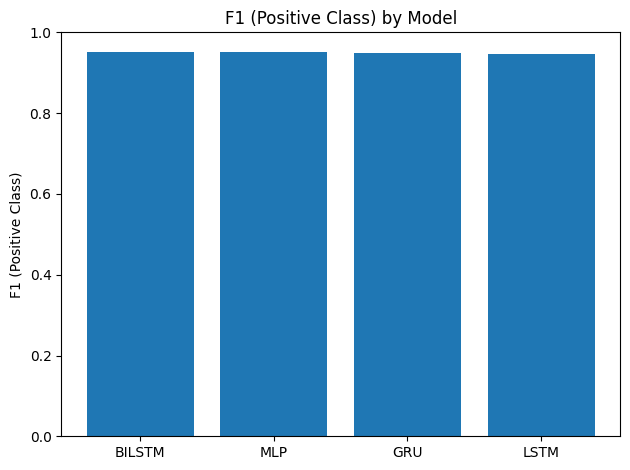

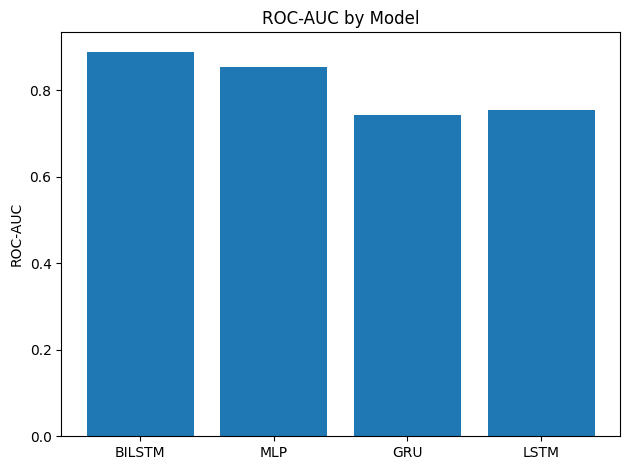

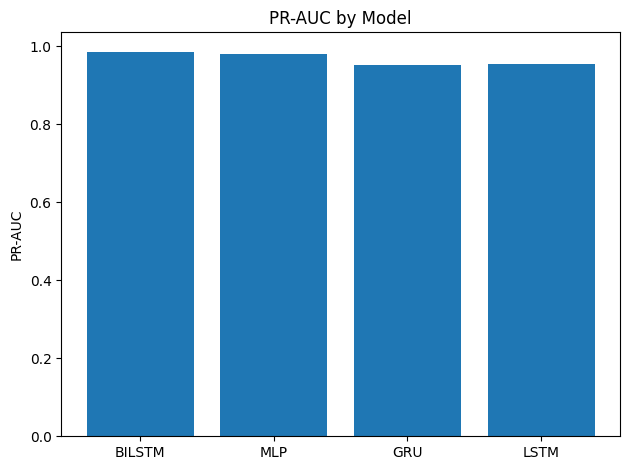

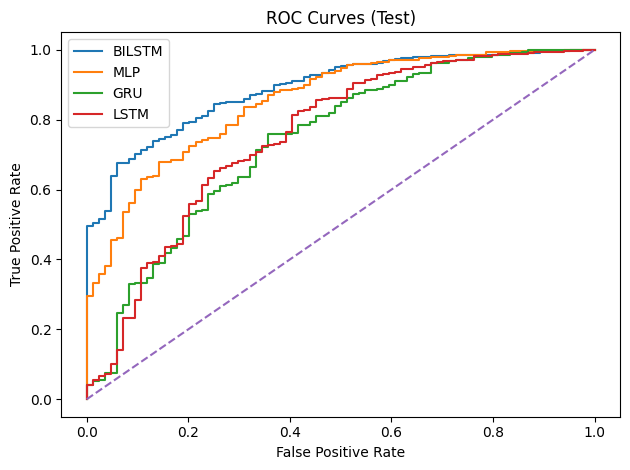

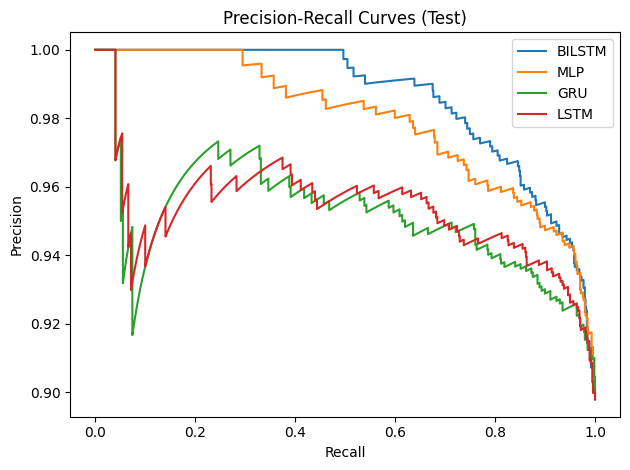

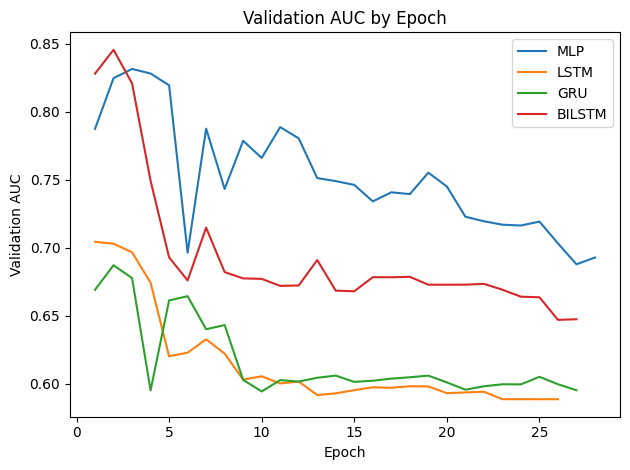

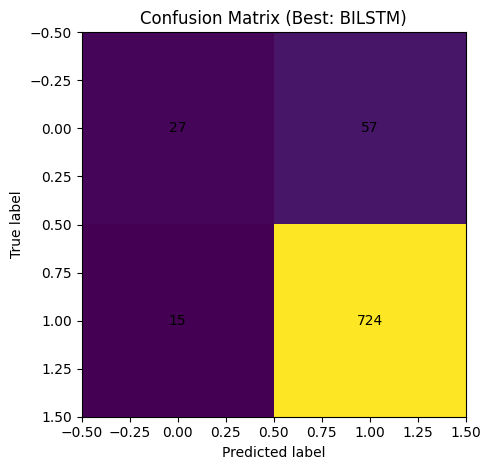


🏆 Best model: BILSTM | F1=0.9526 | Precision=0.9270 | Recall=0.9797 | ROC-AUC=0.8888 | PR-AUC=0.9858 | Threshold=0.058


In [ ]:
# === KPI + Visualization Dashboard for runs_keras ===
import os, json, glob, math
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, precision_recall_curve, roc_curve, auc,
    confusion_matrix, matthews_corrcoef
)
import tensorflow as tf

# -------------------
# CONFIG
# -------------------
PREP_DIR = "prep_out_keras"
RUNS_DIR = "runs_keras"
MODEL_KEYS = ["mlp", "lstm", "gru", "bilstm"]  # which models to look for
BATCH_SIZE = 64

# -------------------
# LOAD DATA
# -------------------
X_val   = np.load(os.path.join(PREP_DIR, "X_val.npy"))
y_val   = np.load(os.path.join(PREP_DIR, "y_val.npy")).reshape(-1,).astype(int)
X_test  = np.load(os.path.join(PREP_DIR, "X_test.npy"))
y_test  = np.load(os.path.join(PREP_DIR, "y_test.npy")).reshape(-1,).astype(int)

with open(os.path.join(PREP_DIR, "meta.json"), "r") as f:
    meta = json.load(f)
VOCAB_SIZE = int(meta["VOCAB_SIZE"])
MAX_LEN    = int(meta["MAX_LEN"])

print("Loaded prep shapes:",
      "\n  X_val ", X_val.shape, " y_val ", y_val.shape,
      "\n  X_test", X_test.shape, " y_test", y_test.shape)

# -------------------
# HELPERS
# -------------------
def latest_run_dir(prefix):
    # e.g., prefix="lstm_" -> pick newest "runs_keras/lstm_*" folder
    paths = sorted(glob.glob(os.path.join(RUNS_DIR, f"{prefix}*")), key=os.path.getmtime)
    return paths[-1] if paths else None

def load_best_model(run_dir):
    # prefer best.keras; fallback to final.keras
    best_path = os.path.join(run_dir, "best.keras")
    final_path = os.path.join(run_dir, "final.keras")
    path = best_path if os.path.exists(best_path) else final_path
    if not os.path.exists(path):
        return None, None
    return tf.keras.models.load_model(path), path

def get_best_threshold(run_dir, y_val, val_probs):
    # use saved metrics.json if present; else compute from val PR curve
    mj = os.path.join(run_dir, "metrics.json")
    if os.path.exists(mj):
        try:
            with open(mj, "r") as f:
                m = json.load(f)
            if "best_threshold" in m:
                return float(m["best_threshold"])
        except Exception:
            pass
    # compute best F1 threshold from validation set
    p, r, t = precision_recall_curve(y_val, val_probs)
    f1 = 2 * p * r / (p + r + 1e-12)
    best_idx = int(np.nanargmax(f1))
    thr = 0.5 if best_idx >= len(t) else float(t[best_idx])
    return thr

def compute_kpis(y_true, probs, thr):
    pred = (probs >= thr).astype(int)
    acc  = accuracy_score(y_true, pred)
    prec = precision_score(y_true, pred, zero_division=0)
    rec  = recall_score(y_true, pred, zero_division=0)
    f1   = f1_score(y_true, pred, zero_division=0)
    roc  = roc_auc_score(y_true, probs)
    pr_p, pr_r, _ = precision_recall_curve(y_true, probs)
    prauc = auc(pr_r, pr_p)
    tn, fp, fn, tp = confusion_matrix(y_true, pred).ravel()
    spec = tn / max(1, (tn + fp))
    mcc  = matthews_corrcoef(y_true, pred) if (tp+tn+fp+fn) > 0 else 0.0
    ppr  = pred.mean()  # predicted positive rate
    return {
        "accuracy": acc, "precision": prec, "recall": rec, "f1": f1,
        "roc_auc": roc, "pr_auc": prauc, "specificity": spec,
        "mcc": mcc, "pred_pos_rate": ppr,
        "tp": int(tp), "tn": int(tn), "fp": int(fp), "fn": int(fn)
    }

def safe_read_history(run_dir):
    path = os.path.join(run_dir, "history.csv")
    if os.path.exists(path):
        try:
            df = pd.read_csv(path)
            return df
        except Exception:
            return None
    return None

# -------------------
# COLLECT RUNS & EVALUATE
# -------------------
records = []
histories = {}

for key in MODEL_KEYS:
    run_dir = latest_run_dir(f"{key}_")
    if not run_dir:
        print(f"⚠️  No run folder found for '{key}'. Skipping.")
        continue

    model, model_path = load_best_model(run_dir)
    if model is None:
        print(f"⚠️  No model found in {run_dir}. Skipping.")
        continue

    print(f"\nEvaluating {key.upper()} from: {model_path}")

    # VAL probs for threshold tuning (if needed)
    val_probs = model.predict(X_val, batch_size=BATCH_SIZE).ravel()
    thr = get_best_threshold(run_dir, y_val, val_probs)

    # TEST probs and KPIs
    test_probs = model.predict(X_test, batch_size=BATCH_SIZE).ravel()
    kpis = compute_kpis(y_test, test_probs, thr)
    kpis["model"] = key
    kpis["threshold"] = float(thr)
    records.append(kpis)

    # stash curves & history for plotting
    # for ROC/PR: keep probs
    np.save(os.path.join(run_dir, "test_probs.npy"), test_probs)
    hist = safe_read_history(run_dir)
    histories[key] = hist

# Make summary table
if not records:
    raise SystemExit("No model results found. Train models first, then re-run this cell.")

df_kpi = pd.DataFrame(records).sort_values(by="f1", ascending=False)
print("\n=== KPI Summary (sorted by F1) ===")
print(df_kpi.to_string(index=False))

stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
out_csv = os.path.join(RUNS_DIR, f"kpi_summary_{stamp}.csv")
df_kpi.to_csv(out_csv, index=False)
print("\nSaved KPI CSV ->", out_csv)

# -------------------
# VISUALIZATIONS
# (matplotlib only; single chart per figure; no custom colors)
# -------------------

def bar(metric, ylabel):
    plt.figure()
    xx = np.arange(len(df_kpi))
    vals = df_kpi[metric].values
    labels = df_kpi["model"].str.upper().tolist()
    plt.bar(xx, vals)
    plt.xticks(xx, labels)
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} by Model")
    plt.tight_layout()
    plt.show()

bar("f1", "F1 (Positive Class)")
bar("roc_auc", "ROC-AUC")
bar("pr_auc", "PR-AUC")

# ROC curves (TEST)
plt.figure()
for _, row in df_kpi.iterrows():
    key = row["model"]
    run_dir = latest_run_dir(f"{key}_")
    probs = np.load(os.path.join(run_dir, "test_probs.npy"))
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=key.upper())
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Test)")
plt.legend()
plt.tight_layout()
plt.show()

# PR curves (TEST)
plt.figure()
for _, row in df_kpi.iterrows():
    key = row["model"]
    run_dir = latest_run_dir(f"{key}_")
    probs = np.load(os.path.join(run_dir, "test_probs.npy"))
    p, r, _ = precision_recall_curve(y_test, probs)
    plt.plot(r, p, label=key.upper())
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves (Test)")
plt.legend()
plt.tight_layout()
plt.show()

# Validation AUC by epoch (from history.csv)
plt.figure()
plotted_any = False
for key, hist in histories.items():
    if hist is not None and "val_AUC" in hist.columns:
        plt.plot(hist.index.values + 1, hist["val_AUC"].values, label=key.upper())
        plotted_any = True
if plotted_any:
    plt.xlabel("Epoch")
    plt.ylabel("Validation AUC")
    plt.title("Validation AUC by Epoch")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No history.csv with 'val_AUC' found to plot training curves.")

# Confusion matrix for the BEST model (by F1)
best_key = df_kpi.iloc[0]["model"]
best_thr = float(df_kpi.iloc[0]["threshold"])
best_run = latest_run_dir(f"{best_key}_")
best_probs = np.load(os.path.join(best_run, "test_probs.npy"))
best_pred  = (best_probs >= best_thr).astype(int)
cm = confusion_matrix(y_test, best_pred)

plt.figure()
plt.imshow(cm, interpolation="nearest")
plt.title(f"Confusion Matrix (Best: {best_key.upper()})")
plt.xlabel("Predicted label")
plt.ylabel("True label")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center")
plt.tight_layout()
plt.show()

# Nice, compact KPI top-line printout
top = df_kpi.iloc[0]
print(f"\n🏆 Best model: {top['model'].upper()} | F1={top['f1']:.4f} | "
      f"Precision={top['precision']:.4f} | Recall={top['recall']:.4f} | "
      f"ROC-AUC={top['roc_auc']:.4f} | PR-AUC={top['pr_auc']:.4f} | "
      f"Threshold={top['threshold']:.3f}")


In [ ]:
import shutil

# Zip the folders
shutil.make_archive("prep_out_keras", 'zip', "prep_out_keras")
shutil.make_archive("runs_keras", 'zip', "runs_keras")

# Download them
from google.colab import files
files.download("prep_out_keras.zip")
files.download("runs_keras.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>